# K-Means Clustering: Music Genres
#### Eric Zander (ericzander.ml@gmail.com)

---

> This notebook contains examples of k-means clustering using data extracted from 30 second snippets of songs from varying genres. This is mostly to demonstrate how k-means works and applications of clustering.

*Data Source: https://www.kaggle.com/insiyeah/musicfeatures?select=data.csv*

---

## Table of Contents

- [Setup](#chapter1)
- [Clustering with Two Features](#chapter2)
- [Clustering with N Features](#chapter3)

---

## 1. Setup <a class="anchor" id="chapter1"></a>

***Import Packages***

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import custom k-means module
import sys
sys.path.append('../')
from kmeans import kmeans

***Load Data***

In [3]:
# Load data
music = pd.read_csv("music_genres.csv")
music

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


***Identify Features, Null Values, and Genres***

In [4]:
# Identify features and check for null values
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

> It appears there are up to 28 continuous features we can cluster with, with 20 of them being "mel frequency cepstral coefficients." There are 1000 total values, with none of them being null.

In [5]:
# Identify the different genres
print(music.label.value_counts())

disco        100
rock         100
blues        100
reggae       100
classical    100
hiphop       100
metal        100
pop          100
country      100
jazz         100
Name: label, dtype: int64


***Defining Goals***

> There are 10 different genres with 100 samples each. Though one goal could involve developing a model that predicts genre via classification algorithms, we will see what clustering with k = 10 yields. We can also change k to gain other insights. But first, let's clarify how k-means clustering works using only 2 features.

---

## 2. Clustering with Two Features<a class="anchor" id="chapter2"></a>

***Tempo and Beats***

> Let's take a look at the relationship between tempo and beats.

In [6]:
def tempo_bpm_scatter(data, ax, title="Tempo vs. BPM", color="black", hue=None):
    """Plots tempo vs beats on a given axis."""
    sns.scatterplot(x=data.tempo, y=data.beats, ax=ax, alpha=0.8,
                    marker='.', color=color, palette="Set1", hue=hue)
    ax.set_title(title)
    ax.set_xlabel("Tempo")
    ax.set_ylabel("BPM")
    ax.set_axisbelow(True)
    ax.grid(linestyle='dashed')

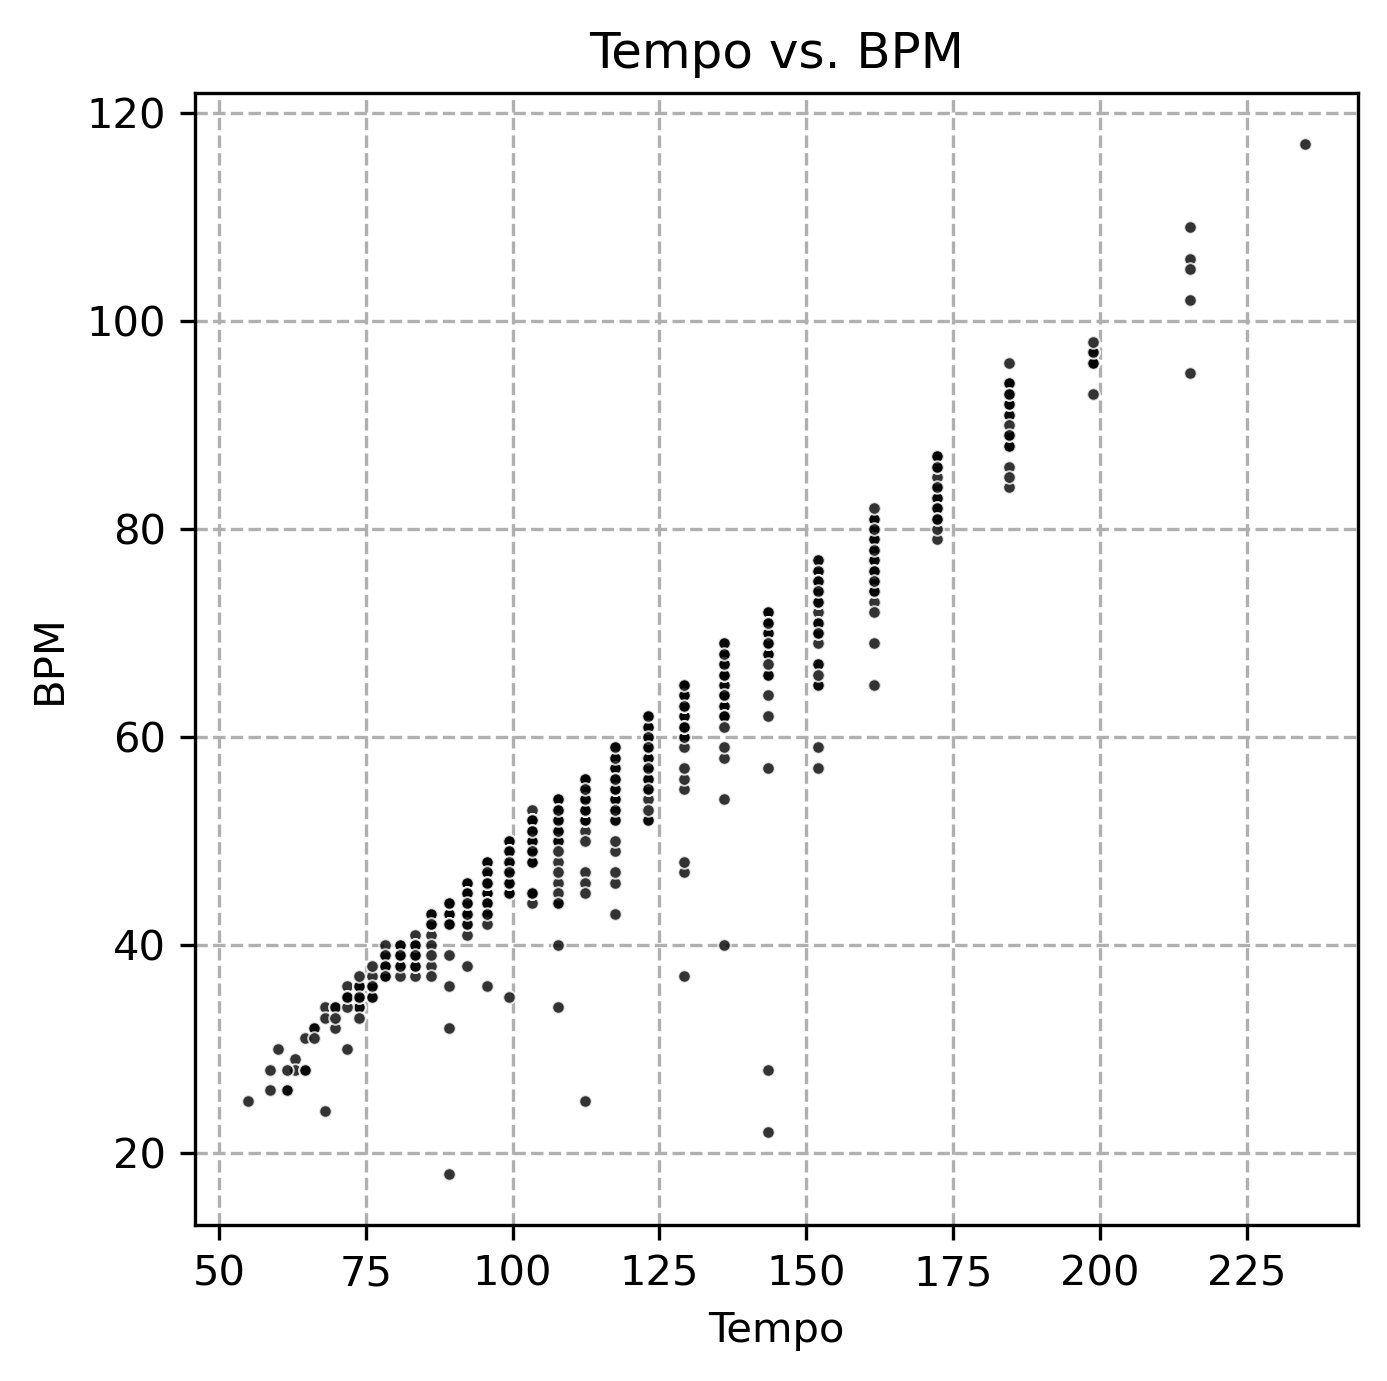

In [7]:
# Plot tempo vs beats
plt.figure(figsize=(5, 5), dpi=300)
tempo_bpm_scatter(music, plt.gca())
plt.show()

> Right away, we can see a clear and unsurprising linear relationship between tempo and beats per minute. How would go about categorizing different songs though?

***Clustering***

> Let's split songs into three categories based on tempo and BPM.

In [8]:
# Cluster with k=3 and save labels in dataframe
km = kmeans(k=3)
music["cluster"] = km.fit(music.loc[:, ["tempo", "beats"]])

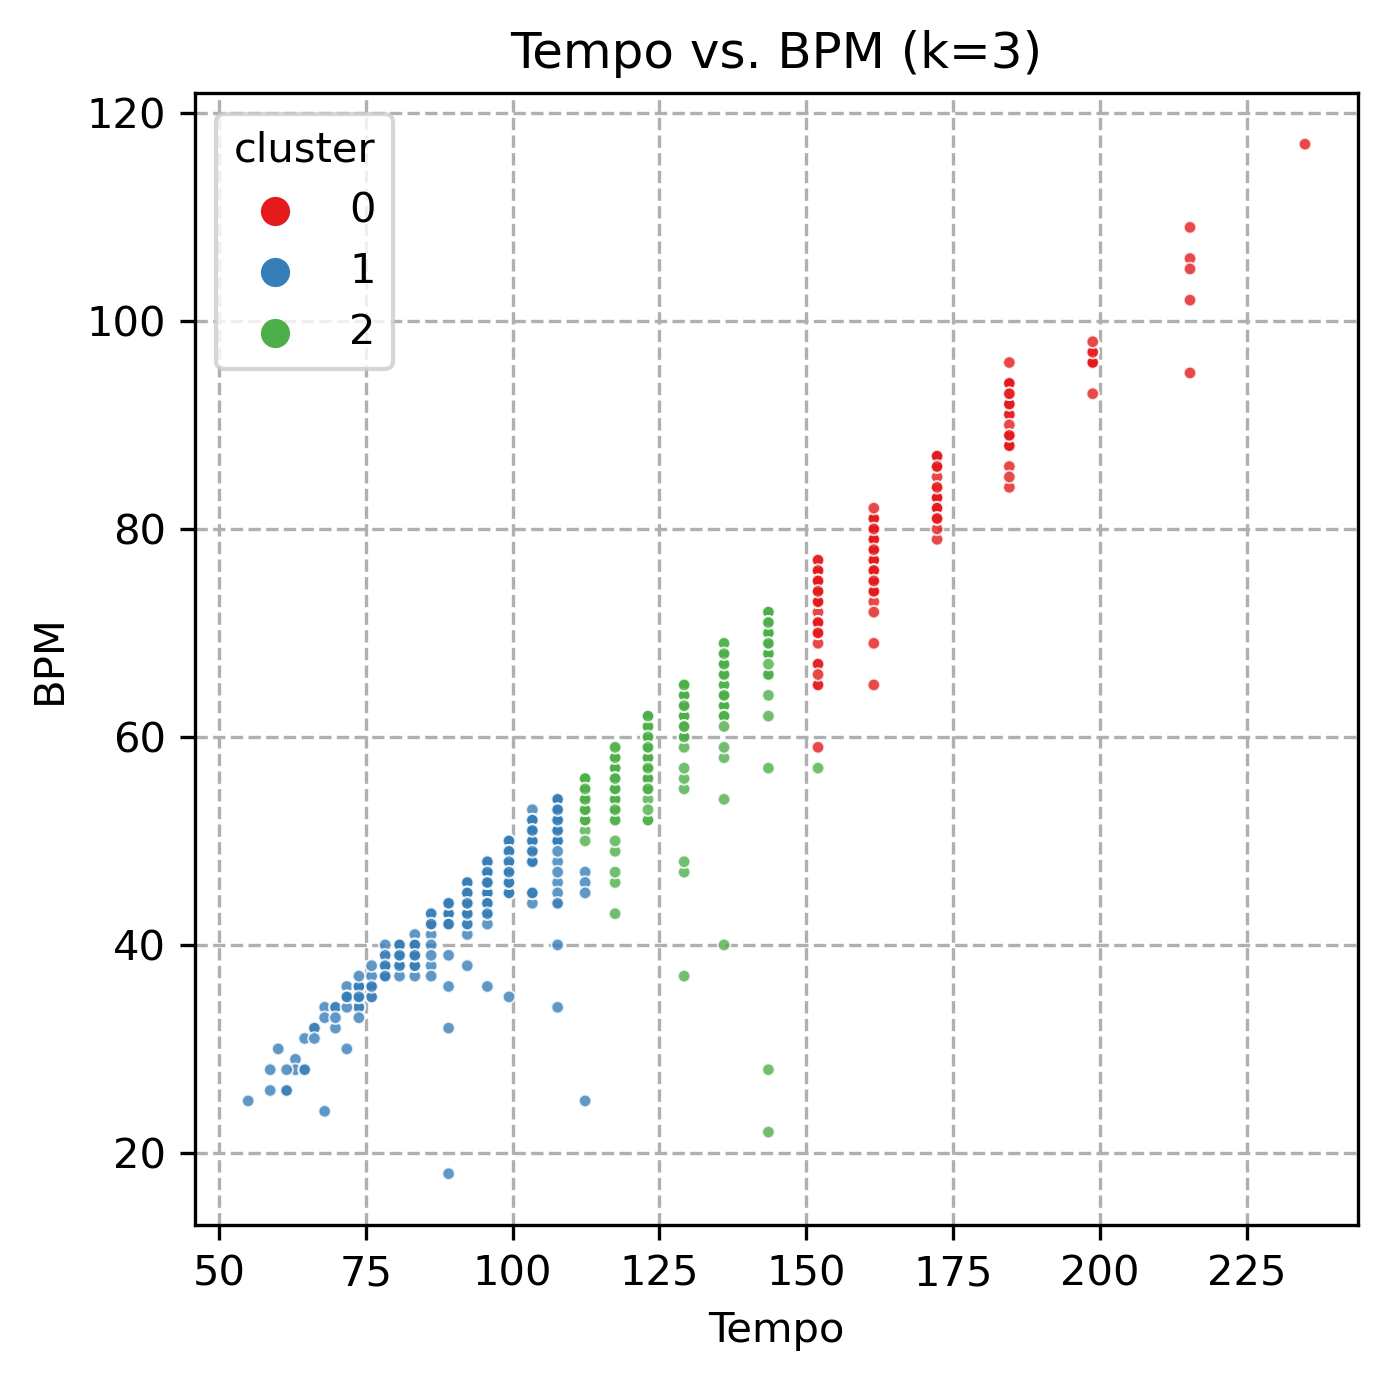

In [9]:
# Plot tempo vs beats with clusters =3
plt.figure(figsize=(5, 5), dpi=300)
tempo_bpm_scatter(music, plt.gca(), "Tempo vs. BPM (k=3)", hue=music.cluster)
plt.show()

> Here you can see the general idea behind clustering. When the model is initialized with k=3, all data points are split into three distinct clusters along the dimensions of the fitted data. Let's take a look at a few other values of k.

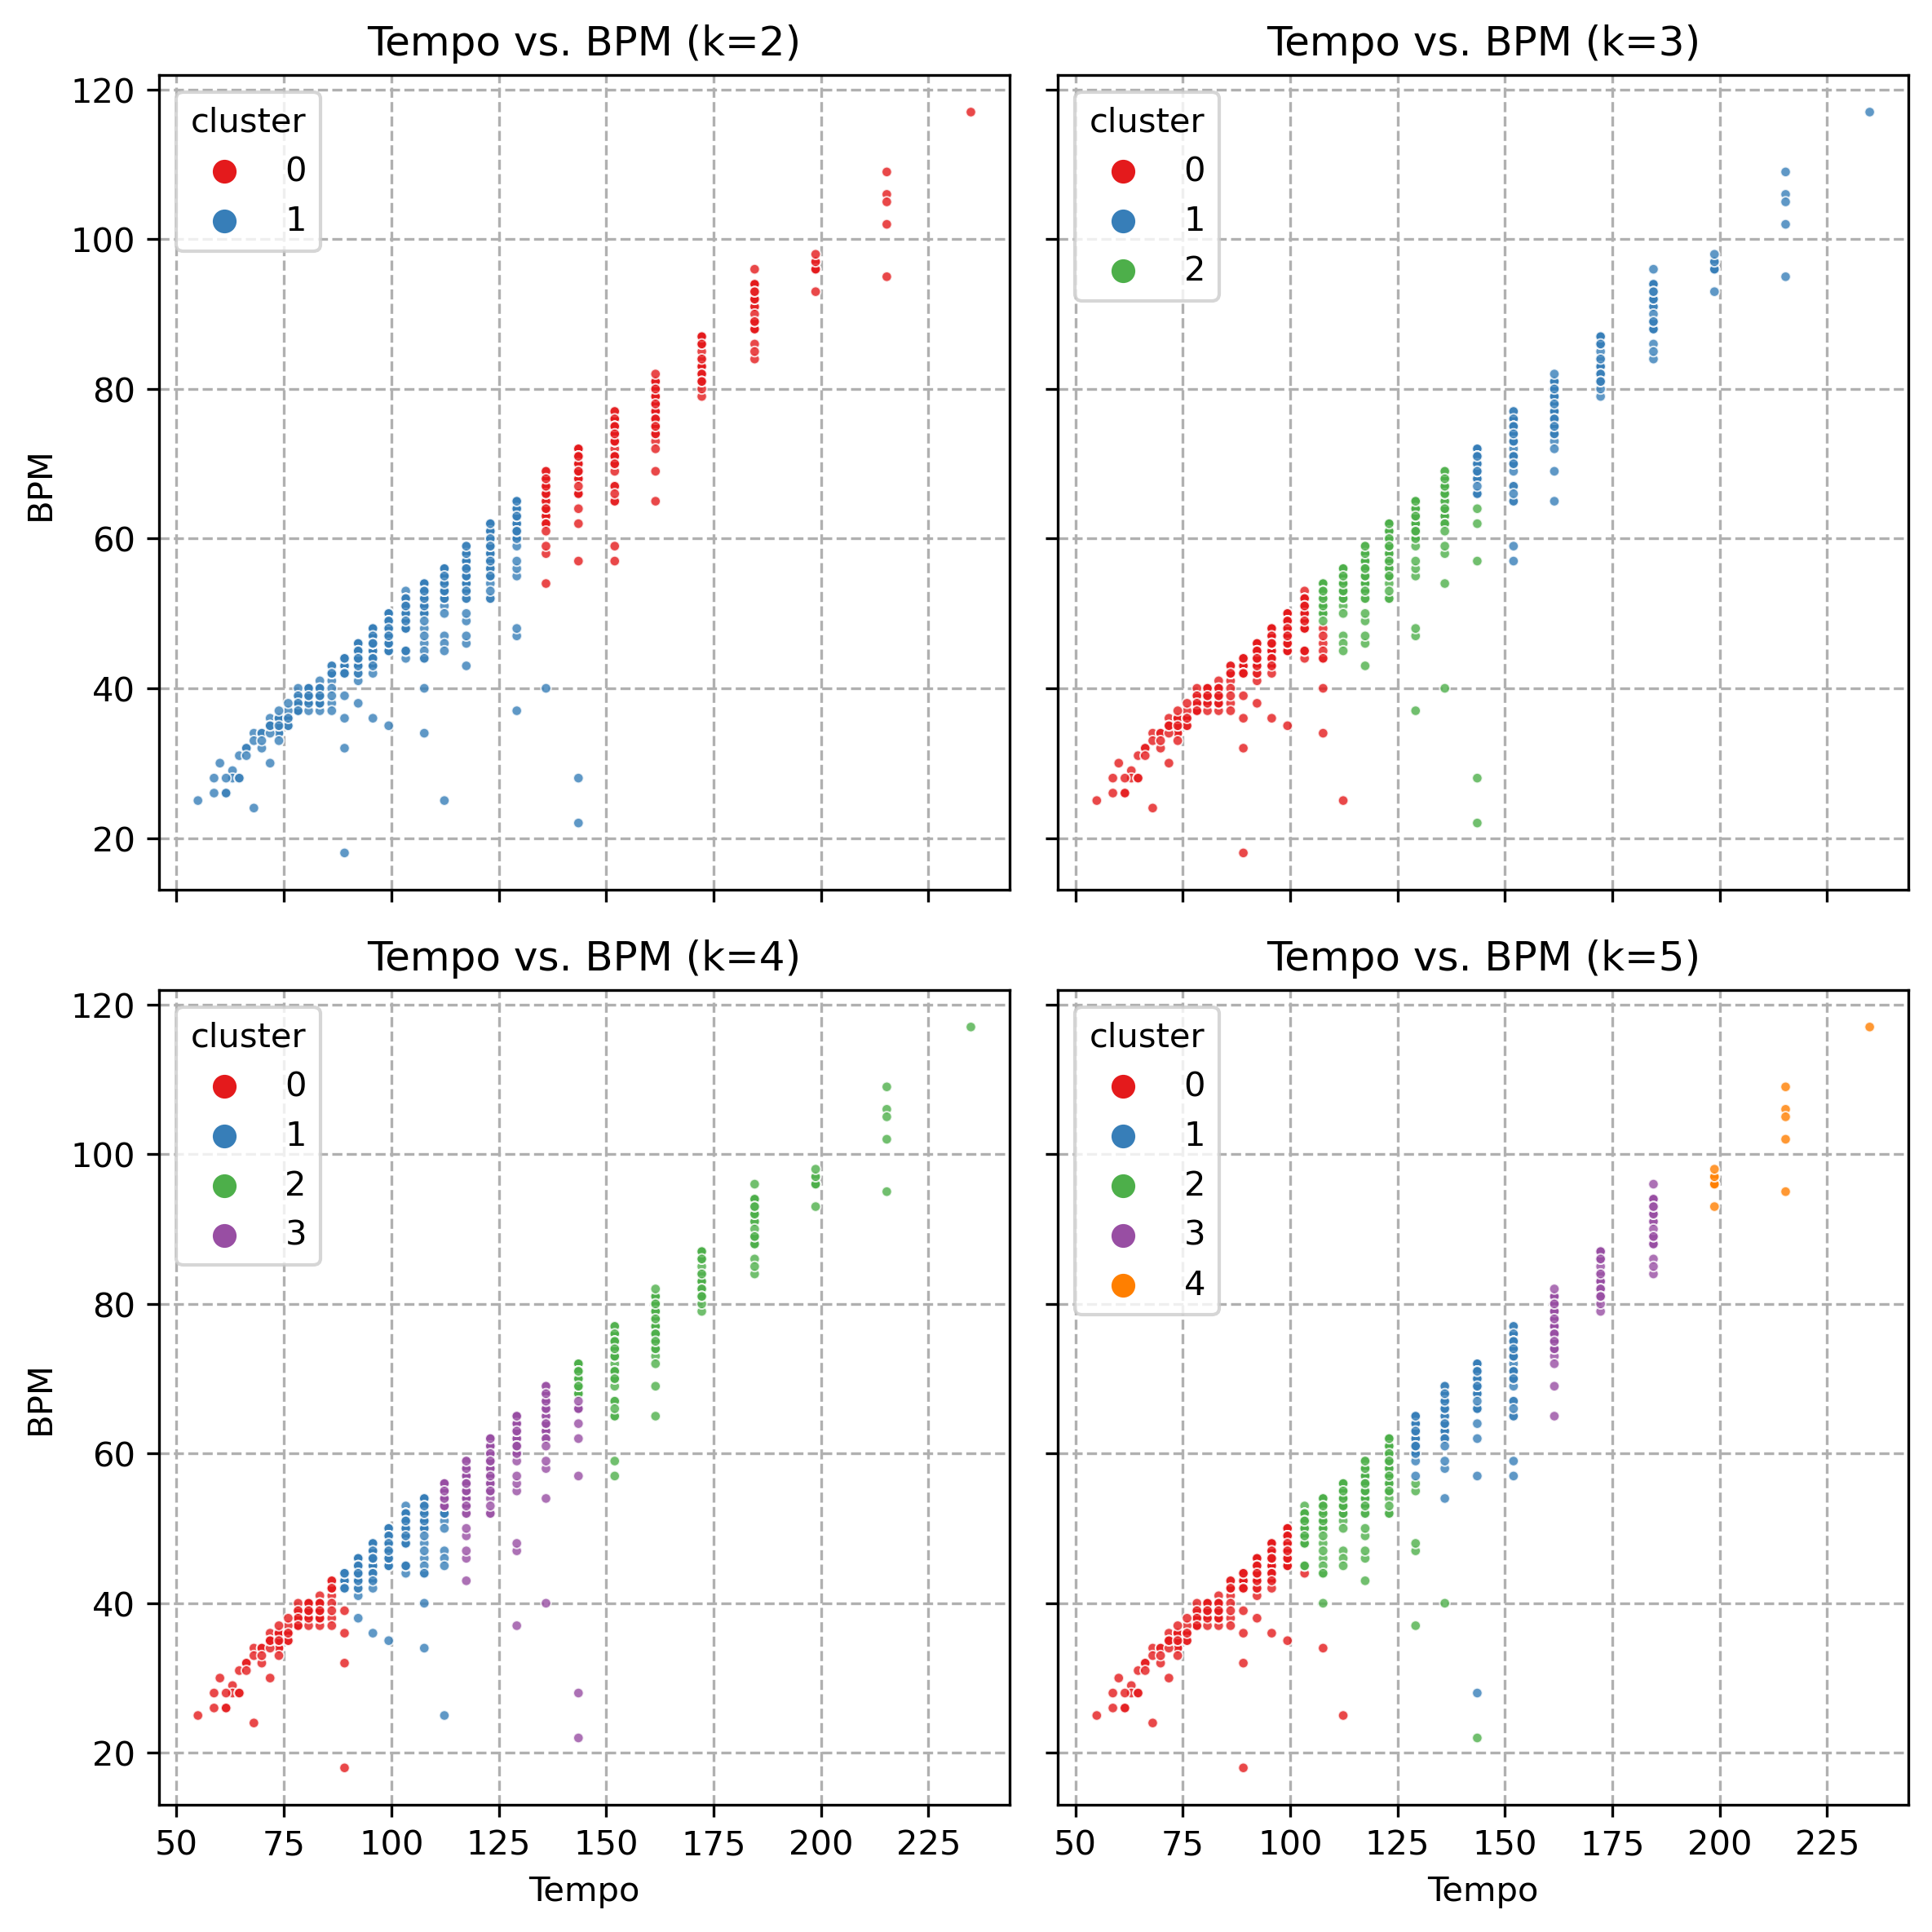

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=300, sharex=True, sharey=True)

for i, ax in enumerate(axes.reshape(-1)):
    # Fit model with k clusters
    k = i + 2
    km = kmeans(k=k)
    music["cluster"] = km.fit(music.loc[:, ["tempo", "beats"]])
    
    # Plot and show
    tempo_bpm_scatter(music, ax, "Tempo vs. BPM (k={})".format(k), 
                      hue=music.cluster)

plt.tight_layout()
plt.show()

***What About Genres?***

> Now that it's clear what k-means clustering does, how might this help us get more info about music? Lets take a closer look at tempo vs. beats by genre.

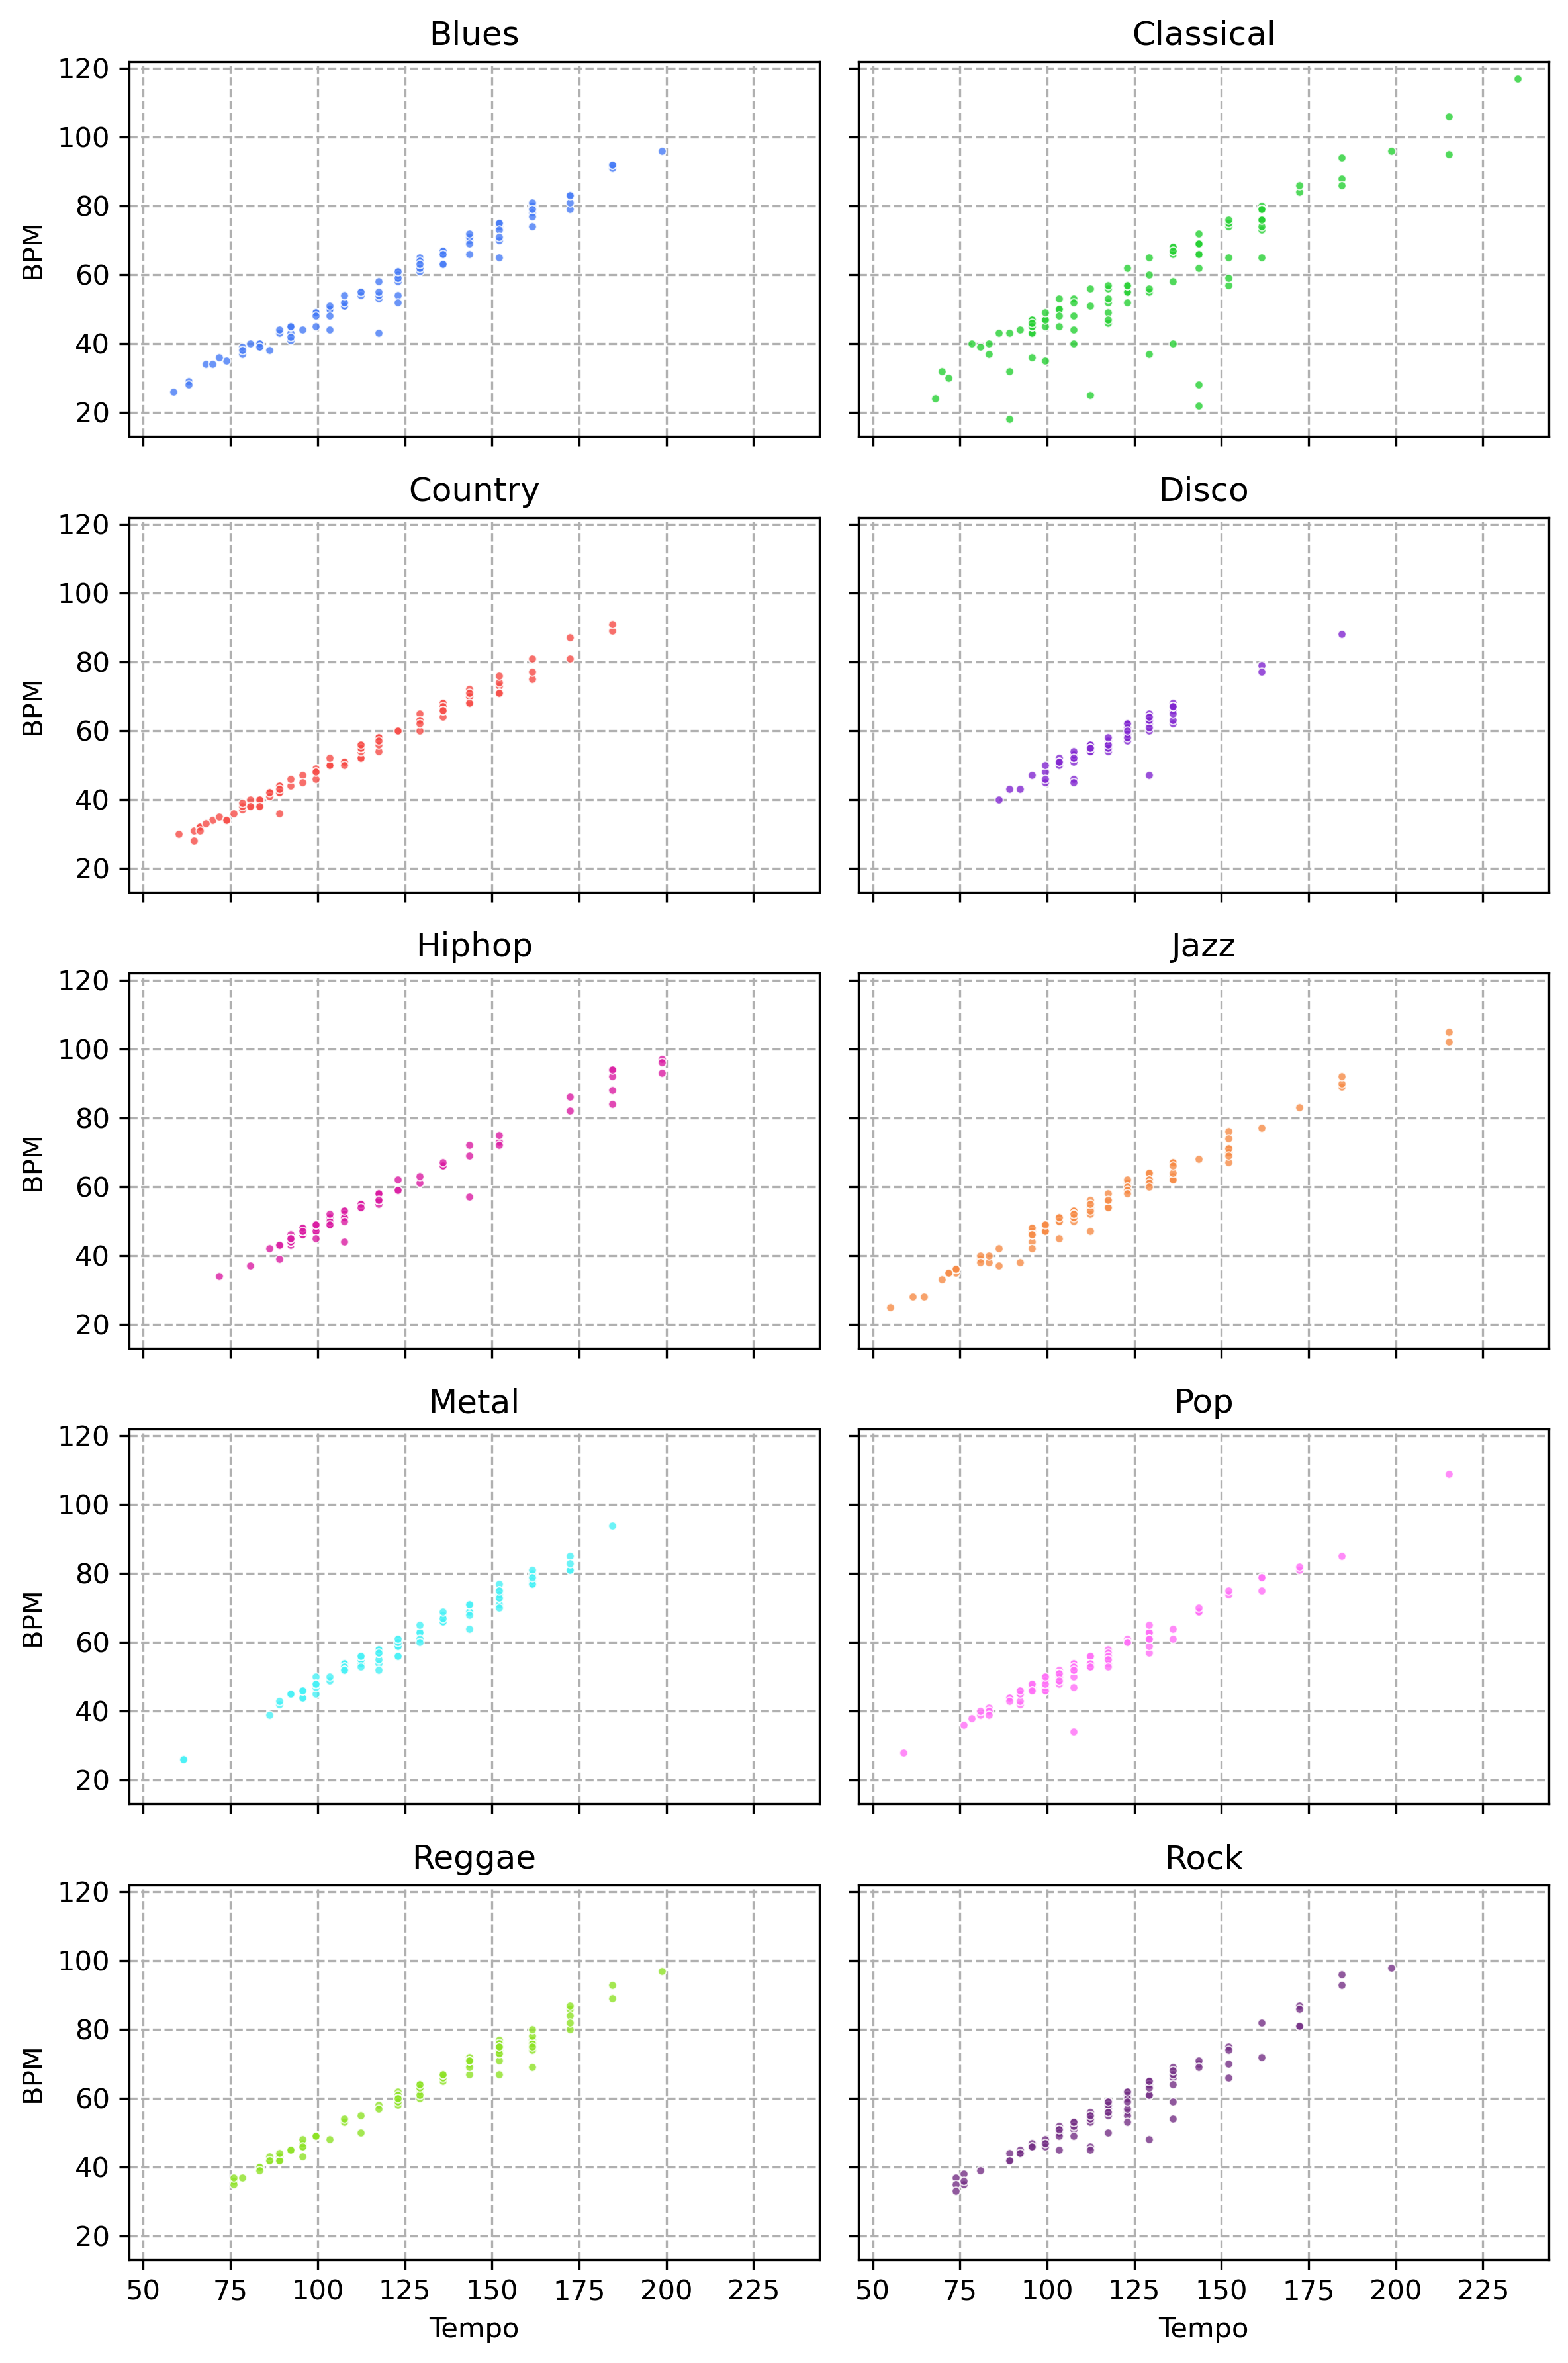

In [11]:
# Save list of genres and colors
genres = list(music.label.unique())
colors = ["#467BF6", "#26D033", "#F64B46", "#8126D0", "#DA1CA2",
          "#F68B46", "#46F1F6", "#FF6EF7", "#8DE225", "#742F85"]

# Create 10 subplots
fig, axes = plt.subplots(5, 2, figsize=(8, 12), dpi=300, 
                         sharex=True, sharey=True)

# Plot for each genre
for i, ax in enumerate(axes.reshape(-1)):
    tempo_bpm_scatter(music[music.label == genres[i]], ax, 
                      genres[i].title(), color=colors[i])
    
plt.tight_layout()
plt.show()

> Though you can begin to see differences in beats and tempo per genre, it's clear that using a higher value of k won't delineate them with these two features alone. Realistically, it may not even do so with many features. Predicting genres in this case would be better handled by classification tools like K-Nearest Neighbors or Gaussian Naive Bayes. The benefit of clustering this type of data comes from identifying novel clusters, which is a consequence of k-means clustering's status as an unsupervised machine learning algorithm. Despite this, lets try clustering at k=10 with more features and compare genres before looking for other insights.

---

## 3. Clustering with N Features <a class="anchor" id="chapter3"></a>

> Let's cluster with k=10 using all continuous features. Normalization would prove helpful for the continuous features, particularly when they are varying in terms of units and orders of magnitude.

***Data Normalization***

In [12]:
# Get list of several continuous features
features = list(music.columns[1:9])
features

['tempo',
 'beats',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate']

In [13]:
# Normalize continuous features (0 to 1 range normalization)
nmusic = music.copy()
nmax = nmusic.loc[:, features].max()
nmin = nmusic.loc[:, features].min()
nmusic.loc[:, features] = (nmusic.loc[:, features] - nmin) / (nmax - nmin)
nmusic.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,cluster
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.359160,0.395333,0.420653,0.319942,0.422280,0.514847,0.482209,0.323696,-144.479173,99.552199,...,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875,1.299000
std,0.157269,0.143694,0.166106,0.167250,0.185266,0.201540,0.198650,0.165269,100.235661,31.331904,...,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561,1.026963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-552.064063,-1.527148,...,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203,0.000000
25%,0.246795,0.292929,0.300655,0.207136,0.273738,0.386410,0.332002,0.191919,-200.695133,76.811480,...,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000,0.000000
50%,0.347222,0.383838,0.429639,0.298348,0.424255,0.506748,0.493180,0.307504,-120.206072,98.452551,...,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198,1.000000
75%,0.450292,0.477273,0.537204,0.434177,0.549110,0.643471,0.603624,0.435773,-73.895019,119.893638,...,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.034587,193.096518,...,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966,4.000000


***Attempt Clustering with k=10***

In [14]:
# Attempt to find clusters for k=10
km = kmeans(k=10)
nmusic.cluster = km.fit(nmusic.loc[:, features], seed=0)

nmusic.cluster.value_counts()

3    156
5    145
9    126
0    123
7    123
6    120
4     85
2     51
8     47
1     24
Name: cluster, dtype: int64

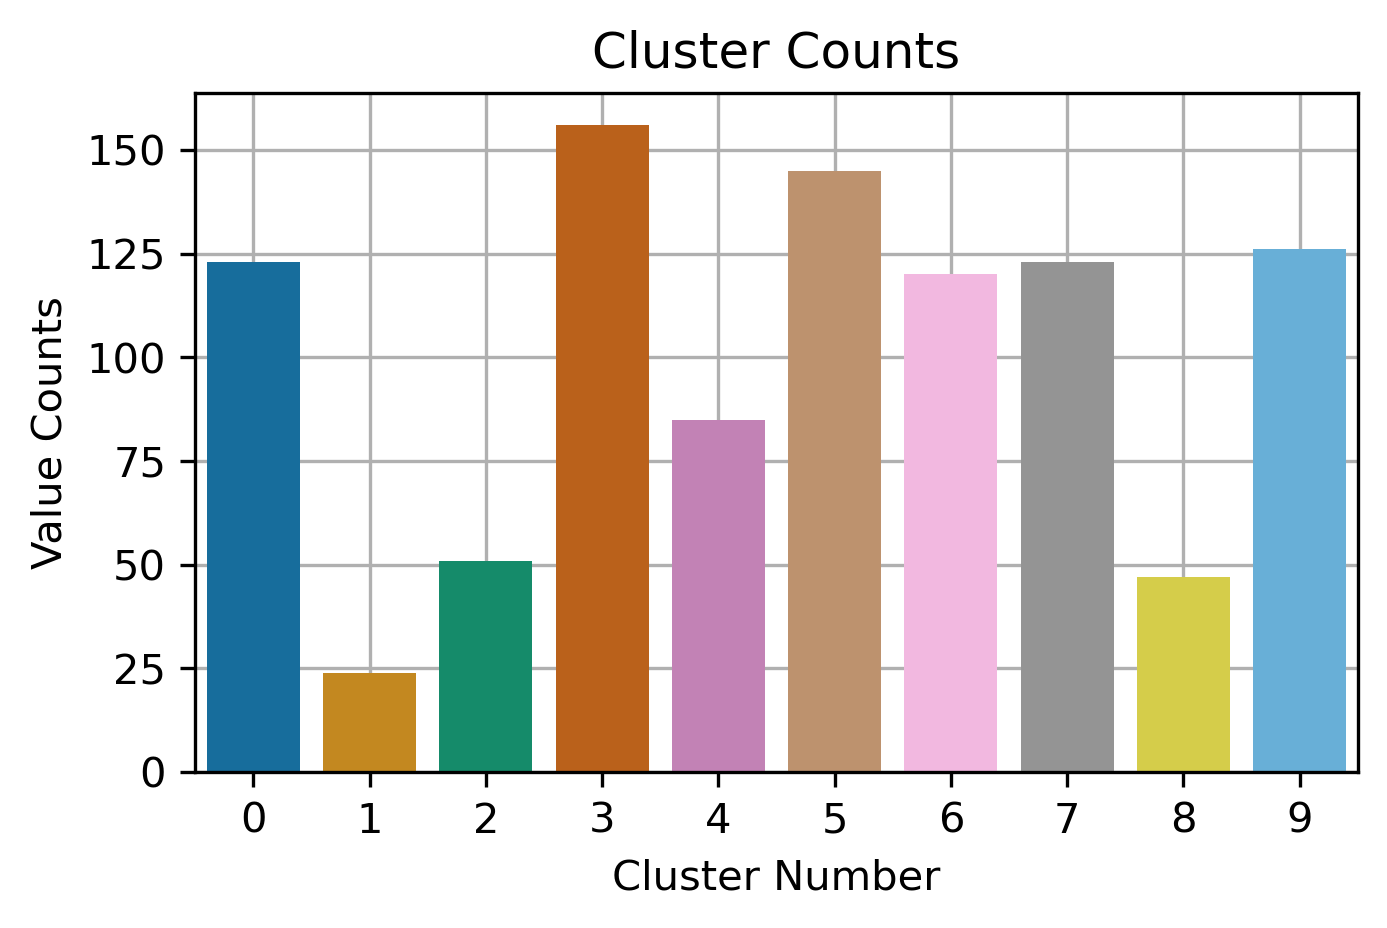

In [15]:
# Save unique cluster value counts
val_counts = nmusic.cluster.value_counts()

# Plot clusters counts
plt.figure(figsize=(5, 3), dpi=300)
sns.barplot(x=val_counts.keys(), y=val_counts.values, palette="colorblind")
plt.title("Cluster Counts")
plt.xlabel("Cluster Number")
plt.ylabel("Value Counts")
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

> Given the random initialization of clusters, clustering with more and more features with high values for k can result in wildly different value counts or even empty centroids. Though this can be partially addressed with another centroid initialization method such as k++ or by a more rigorous feature selection process, this reflects general limitations for k-means clustering when dealing with varying data. Regardless, let's see how these clusters align with genre.

***Cluster by Genre***

In [16]:
def genre_cluster_barplot(data, ax, title="Genre Cluster Counts"):
    g_valcounts = data.cluster.value_counts()
    sns.barplot(x=g_valcounts.keys(), y=g_valcounts.values,
                ax=ax, palette="Set1")
    ax.set_title(title)
    ax.set_xlabel("Cluster Number")
    ax.set_ylabel("Value Counts")
    ax.set_axisbelow(True)
    ax.grid()

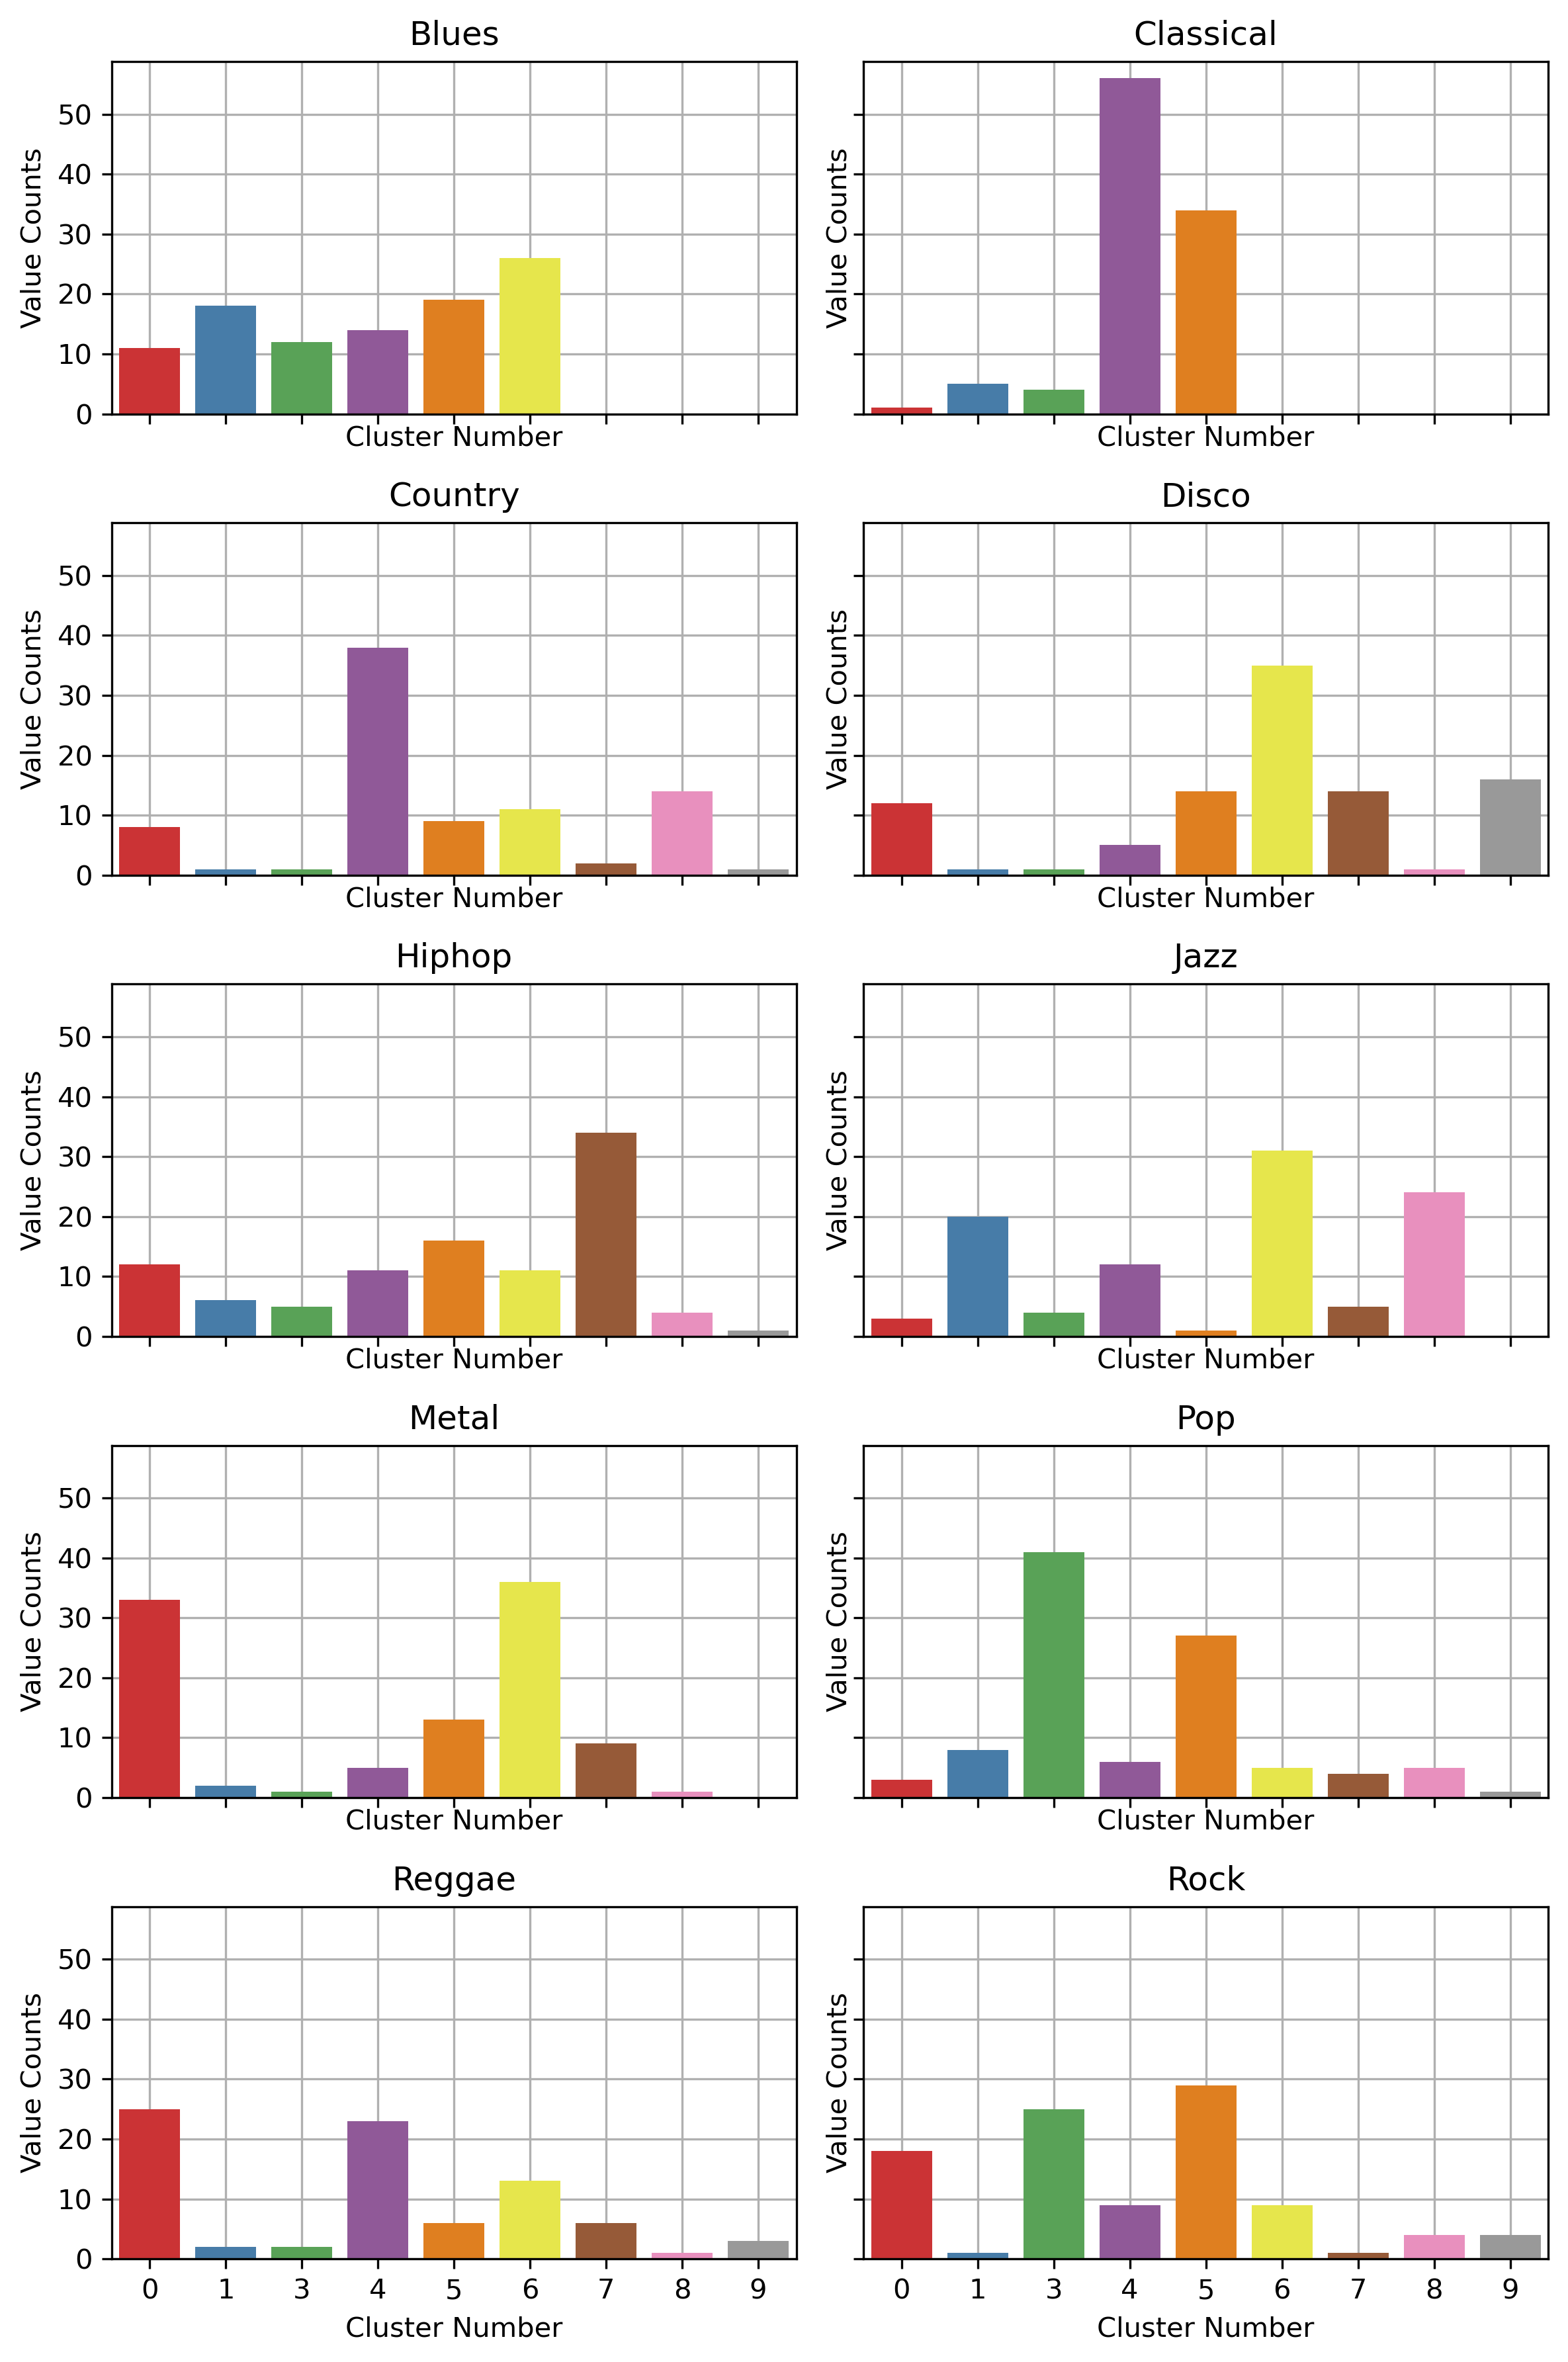

In [17]:
# Create 10 subplots
fig, axes = plt.subplots(5, 2, figsize=(8, 12), dpi=300, 
                         sharex=True, sharey=True)

# Plot for each genre
for i, ax in enumerate(axes.reshape(-1)):
    genre_cluster_barplot(nmusic[nmusic.label == genres[i]], ax, 
                          genres[i].title())
    
plt.tight_layout()
plt.show()

> Though each genre has a distinct cluster profiles, it's pretty clear that the clusters derived from these features hardly represent the genres. But what do they represent? To get a better idea of this, let's compare feature values and distributions for a smaller number of clusters.

***Features when k=3***

In [18]:
# Cluster with k=3
km = kmeans(k=3)
nmusic.cluster = km.fit(nmusic.loc[:, features], seed=0)

In [19]:
def cluster_feature_boxplot(data, feature, ax, title="Cluster Features"):
    clusters = data.cluster.value_counts()
    sns.boxplot(x="cluster", y=feature, data=data, ax=ax, palette="Set1")
    ax.set_title(title)
    ax.set_xlabel("Cluster Number")
    ax.set_ylabel("Value Counts")
    ax.set_axisbelow(True)
    ax.grid()

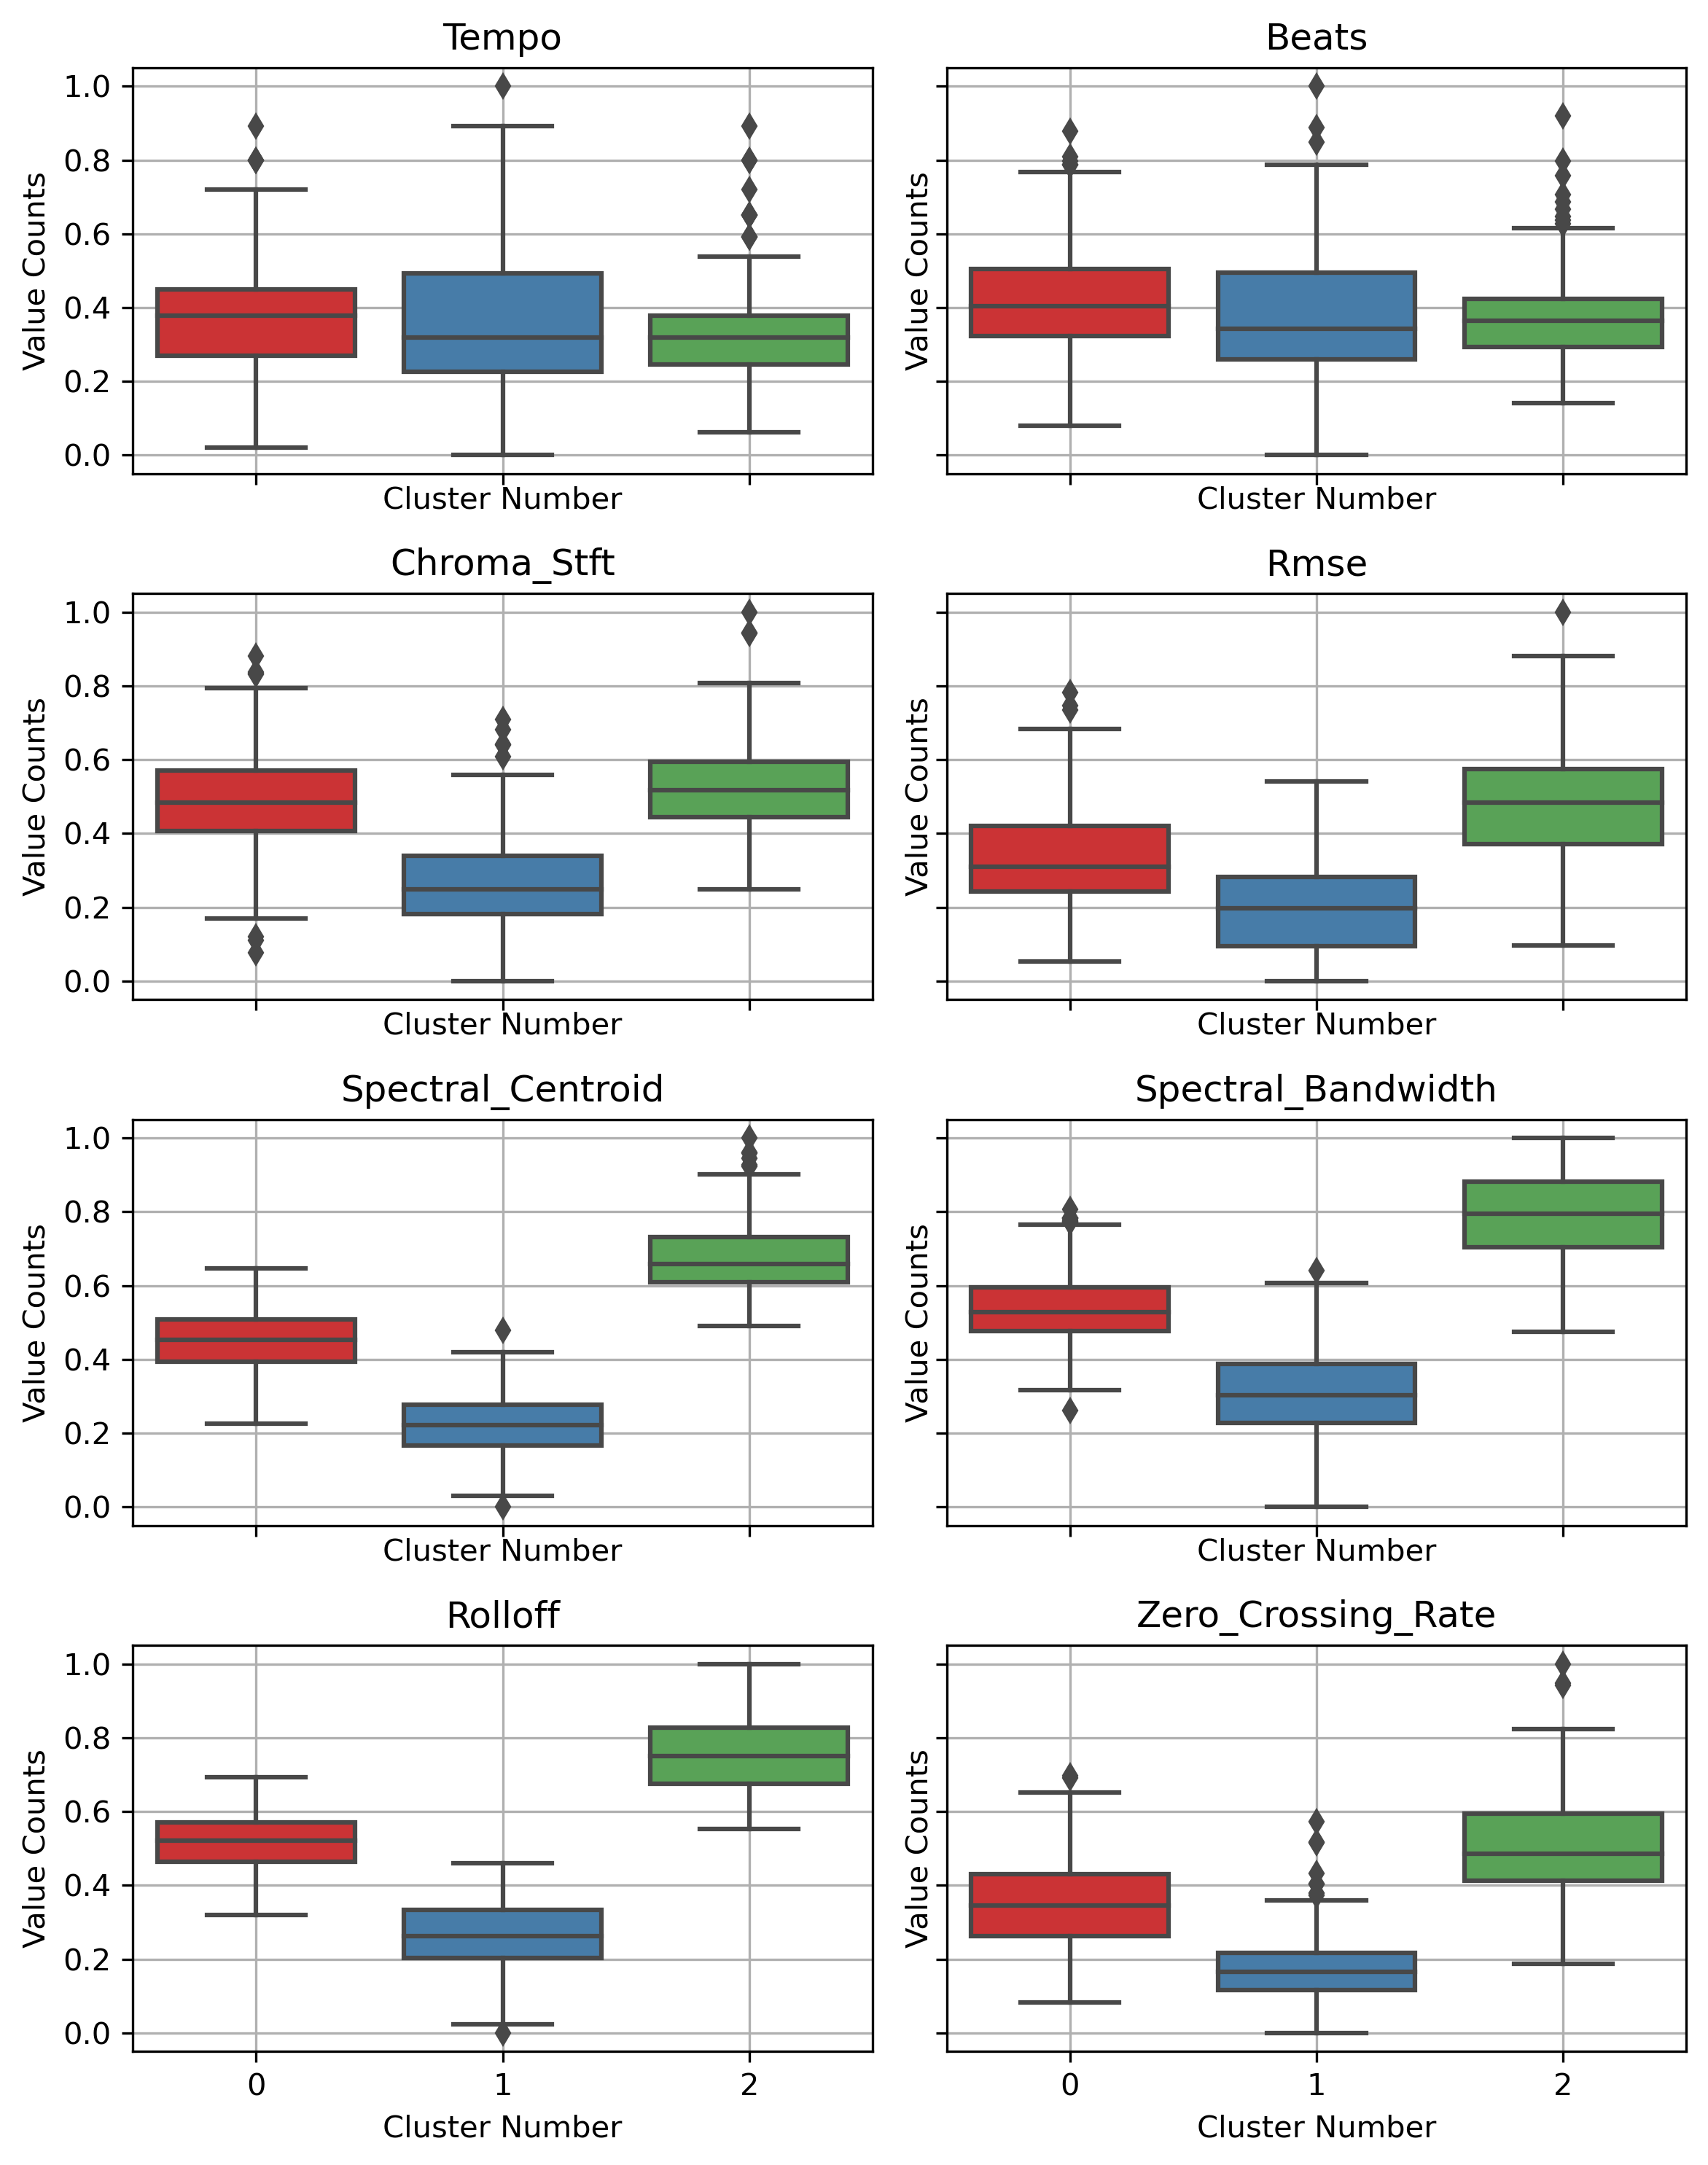

In [20]:
# Create 10 subplots
fig, axes = plt.subplots(4, 2, figsize=(8, 10), dpi=300, 
                         sharex=True, sharey=True)

# Plot for each genre
for i, ax in enumerate(axes.reshape(-1)):
    cluster_feature_boxplot(nmusic, features[i], ax, features[i].title())
    
plt.tight_layout()
plt.show()

> When k=3, it appears that clusters are influenced less by tempo and beats, where we saw lots of overlap between genres, and more by features like spectral centroid and rolloff.

---

***Conclusion***

> This exercise clarifies the importance of feature selection to the unsupervised learning process. In this case, we have the capabilities of creating an arbitrary number of clusters of data based on features. If we wanted to identify 4 groups of song snippets that vary in spectral centroid and spectral bandwidth, we could do that. If we wanted to find 6 groups of customer types of different incomes and demographics, we could do that given the data. If we wanted to split locations on a map into 10 different regions, we could do so if we had data concerning the location.

> If you want to learn more about how k-means clustering works or its value in data analysis and elsewhere, check out these wikipedia page:
    https://en.wikipedia.org/wiki/K-means_clustering

---

***Image Processing***

> It makes sense to return to the problem of identifying genre using these features with a supervised learning approach. However, to further demonstrate the capabilities of k-means clustering, we can look at the applications in image processing. See the flowers clustering notebook for examples of k-means applications in segmentation and compression!